<a href="https://colab.research.google.com/github/jaunty0216/ForSophomoreCourse/blob/main/%E7%AC%AC%E5%85%AD%E9%80%B1_%E8%AE%93%E6%88%91%E5%BA%B7%E5%BA%B7%E5%B0%BC%E5%80%91%E8%B2%B7%E4%BA%86%E7%94%9A%E9%BA%BC%E5%91%A2~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標
根據數據，整理出摻雜在其中的變數，並分析變數之間的關聯，並繪圖

# 作業內容

**邏輯順序**
1.   匯入資料(超商的銷售紀錄表)
2.   轉換成dataframe
3.   取樣數據(製作篩選條件)
4.   圖一：折線圖
5.   圖二：熱力圖
6.   圖三：機器學習



# 畫圖囉
施了一點魔法

有matplotlib版本和plot.express版本

兩者差異：
  *   matplotlib：就是照片，沒啥好說的，嗯。
  *   清單項目：可以互動，像是放大，游標到了一格上方會跑出資料

1.   熱力圖
2.   堆疊圖
3.   PCA分析圖



In [ ]:
# 上傳 CSV 檔案
uploaded = files.upload()

Saving DataOfSupermarket.csv to DataOfSupermarket (1).csv


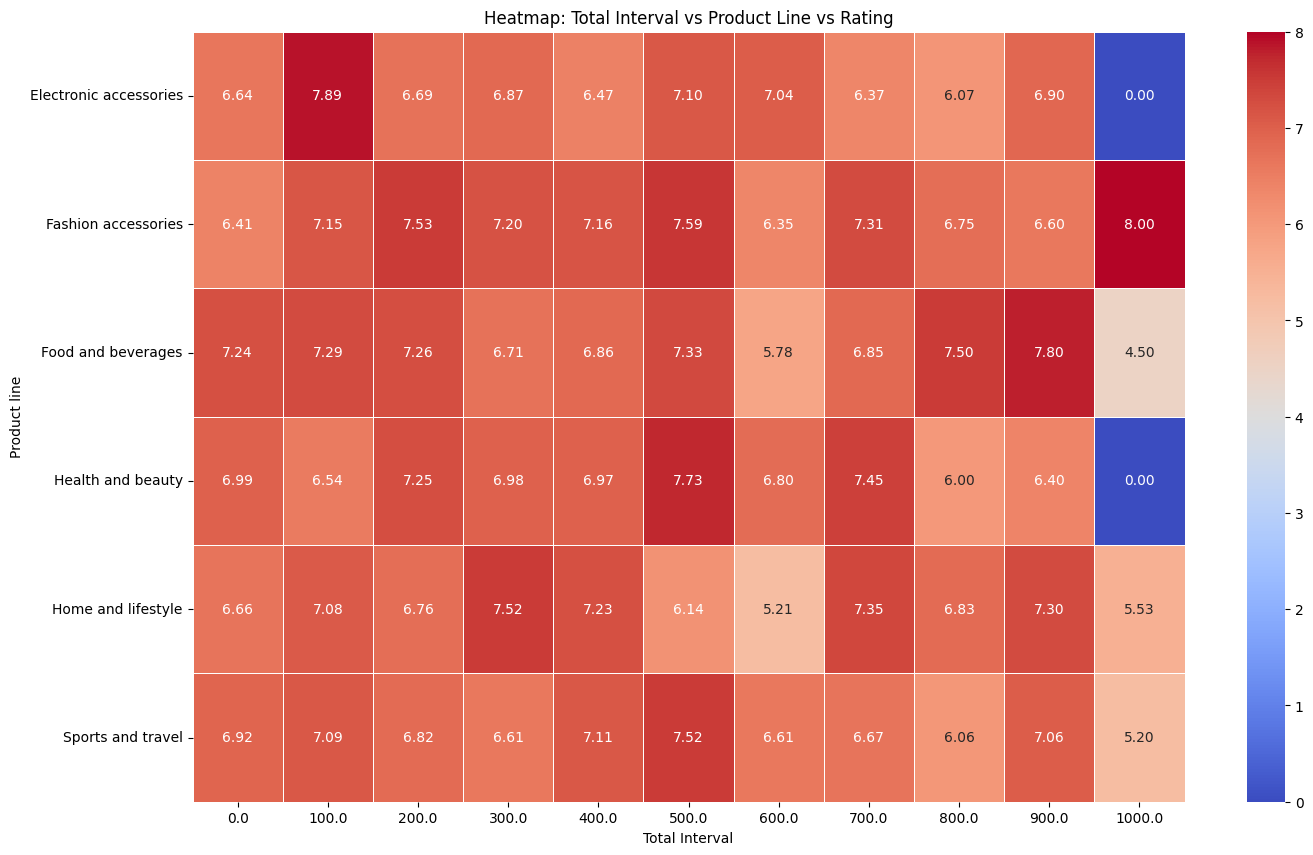

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# 讀取資料檔案
file_name = next(iter(uploaded.keys()))
data = pd.read_csv(file_name)

# 將 Total 轉換為數值型並劃分區間
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')
data['Total Interval'] = (data['Total'] // 100) * 100

# 聚合資料以計算平均 Rating
aggregated_data = data.groupby(['Product line', 'Total Interval'])['Rating'].mean().reset_index()

# 創建透視表來生成熱力圖所需的數據
heatmap_data = aggregated_data.pivot_table(index='Product line', columns='Total Interval', values='Rating', aggfunc='mean')

# 排序區間 (Total Interval)
heatmap_data = heatmap_data.sort_index(axis=1)

# 填補空白值為0
heatmap_data = heatmap_data.fillna(0)

# 繪製更新後的熱力圖
TheHeatMap = plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap: Total Interval vs Product Line vs Rating')
plt.xlabel('Total Interval')
plt.ylabel('Product line')
plt.show()
#這是matplotlib版本

In [32]:
import pandas as pd
import plotly.express as px
import plotly.io as pio


# 讀取資料檔案
file_name = next(iter(uploaded.keys()))
data = pd.read_csv(file_name)

# 將 Total 轉換為數值型並劃分區間
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')
data['Total Interval'] = (data['Total'] // 100) * 100


# 聚合資料以計算平均 Rating
aggregated_data = data.groupby(['Product line', 'Total Interval'])['Rating'].mean().reset_index()

# 使用 Plotly Express 繪製熱力圖，並將其儲存到變數 TheHeatMap
TheHeatMap = px.imshow(
    aggregated_data.pivot(index='Product line', columns='Total Interval', values='Rating'),
    color_continuous_scale=px.colors.sequential.RdBu,  # 使用 plotly.colors.sequential 中的預設顏色表
    labels={"color": "Rating"}
)

TheHeatMap.update_layout(
    title="Heatmap: Total Interval vs Product Line vs Rating",
    xaxis_title="Total Interval",
    yaxis_title="Product line"
)

# 顯示圖表
TheHeatMap.show()
# 把圖表轉換成html，並使用pil的功能
TheHeatMap_html = pio.to_html(TheHeatMap)
# 這是plotly.express版本

從這個熱力圖中可以看到**價錢區間**和產品**種類之間**的關係，也可以看到...
1.   價格高得到的評分不一定是好的
2.   也有便宜且受到好評的
3.   各種產品的評分其實都挺好的



<Figure size 1200x800 with 0 Axes>

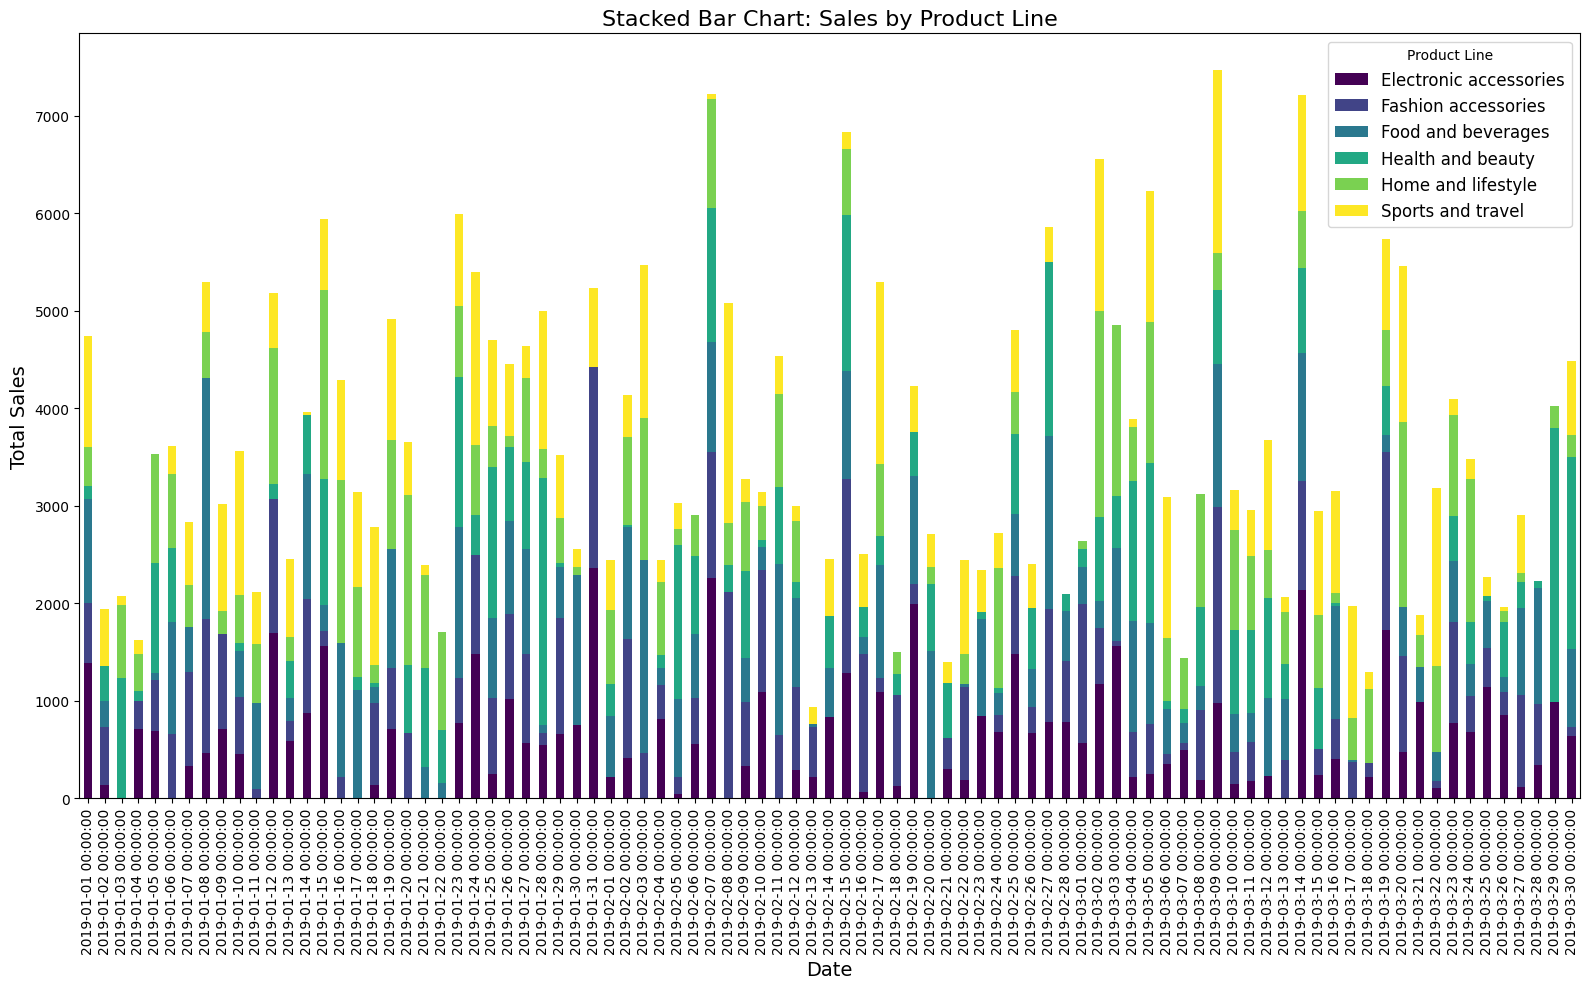

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv("DataOfSupermarket.csv")

# 確保 Date 欄為日期格式
data['Date'] = pd.to_datetime(data['Date'])

# 按 Product line 和 Date 聚合資料，計算各產品線在每個日期的銷售總額
aggregated_data = data.groupby(['Date', 'Product line'])['Total'].sum().unstack()

# 繪製堆疊圖
plt.figure(figsize=(12, 8))
aggregated_data.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis')
plt.title('Stacked Bar Chart: Sales by Product Line', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title="Product Line", fontsize=12)
plt.tight_layout()
plt.show()
#這是matplotlib版

In [ ]:
import pandas as pd
import plotly.express as px

# 讀取資料
data = pd.read_csv("DataOfSupermarket.csv")

# 確保 Date 欄為日期格式
data['Date'] = pd.to_datetime(data['Date'])

# 繪製堆疊柱狀圖
stack = px.bar(
    data,
    x="Date",
    y="Total",
    color="Product line",
    title="Stacked Bar Chart: Sales by Product Line",
    labels={"Date": "Date", "Total": "Total Sales", "Product line": "Product Line"},
)

stack.show()
#這是plotly.express的版本
stack_html = pio.to_html(stack)

從這一張表可以看到每一天不同種類的銷售狀況，還可以看到整體的銷售狀況。

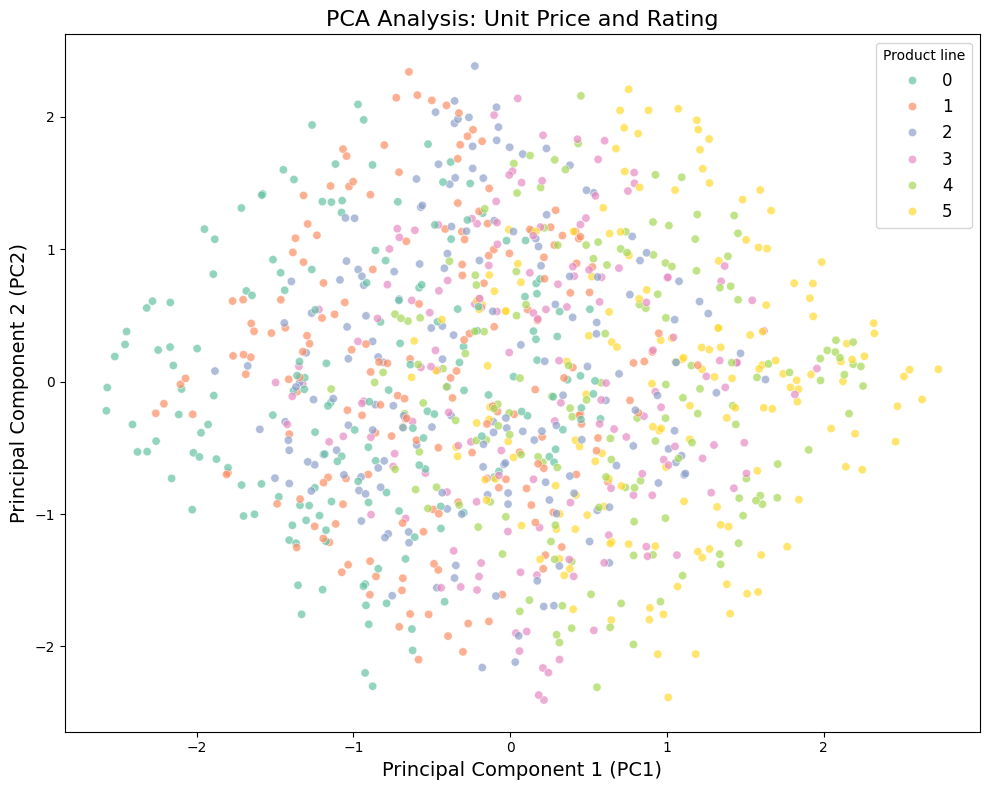

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 讀取資料
data = pd.read_csv("DataOfSupermarket.csv")

# 提取需要的欄位並去除遺漏值
filtered_data = data[['Unit price', 'Rating', 'Product line']].dropna()

# 將 Product line 編碼為數值 (因為 PCA 無法直接處理文字資料)
filtered_data['Product line'] = filtered_data['Product line'].astype('category').cat.codes

# 標準化數據
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[['Unit price', 'Rating', 'Product line']])

# 執行 PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 將 PCA 結果與原始資料整合
pca_df['Product line'] = filtered_data['Product line']

# 繪製 PCA 結果，顯示 Unit price 與 Rating 的關係
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Product line'], palette="Set2", alpha=0.7)
plt.title('PCA Analysis: Unit Price and Rating', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
plt.legend(title="Product line", fontsize=12)
plt.tight_layout()
plt.show()
#這是matplotlib的版本

In [38]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 讀取資料
data = pd.read_csv("DataOfSupermarket.csv")

# 提取需要的欄位並去除遺漏值
filtered_data = data[['Unit price', 'Rating', 'Product line']].dropna()
checking_data = filtered_data['Product line']
# 將 Product line 編碼為數值 (因為 PCA 無法直接處理文字資料)
filtered_data['Product line'] = filtered_data['Product line'].astype('category').cat.codes

# 標準化數據
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[['Unit price', 'Rating', 'Product line']])

# 執行 PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 加入 Product line
pca_df['Product line'] = filtered_data['Product line'].astype(str)

# 獲取產品線名稱
product_lines = checking_data.unique()

# 創建映射 (使用 pandas Series)
product_line_mapping = pd.Series(product_lines, index=pd.Index(range(len(product_lines)), dtype="object"))

# 替換數字
pca_df['Product line'] = pca_df['Product line'].astype(int).map(product_line_mapping)

# 使用 Plotly 繪製互動式散點圖 (更新後的程式碼)
PCA_graph = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    color="Product line",  # 使用更新後的 Product line 欄位
    title="PCA Analysis: Unit Price and Rating",
    labels={"PC1": "Principal Component 1 (PC1)", "PC2": "Principal Component 2 (PC2)", "Product line": "Product line"},
    opacity=0.7,
)

PCA_graph.show()
#這是plotly.express的版本

**分析**：(我可能還要再去和其他人請教)

從這張圖表中看到pca2分布的很均勻，所以pca2的影響不怎麼大

反觀pca1，可以看到，pca1的值越大，"fashion accessories"的分布越多；pca1的值越小，"Health and beauty"的分布越多。

說明"fashion accessories"的pca1特徵較大較明顯；"Health and beauty"的pca1特徵較小較不明顯。

# 總結
學到了哪些東西呢?


1.   **老師**的專案
  *   pd.**to_datetime**(df['timestamp'])
      * 這是pandas調整時間格式的方式，重點是**to_datetime**
  *   alldays = max(**set**(df['timestamp'].**dt**.date)) - min(set(df['timestamp'].dt.date))
      *   計算總共有多少天，對，直接減是可以的，set的意思是找出**唯一的**
      *   如果要萃取出特定的時間資料，要**先經過dt**，在選要甚麼時間資料。
  *   df_expanded = pd.json_normalize(df['json'].**apply(json.loads))**
      *   apply，對所有父物件**執行apply內的函數**
  *   allStudents = len(video_activity_info['actor.name'].**unique())**
      *   使用了unique函數提取單一的資料
  *   filtered_df = video_activity_info.**dropna**(**subset**=['theme'])
      *   使用dropna清除NaN值
      *   使用subset選擇要清除哪一個
  *   pivoted_df = filtered_df.**pivot_table**(index=['actor.name', 'Date'],columns='verb.display.zh-TW', values='theme', aggfunc=lambda x: ', '.join(x))
      *   使用pivot_table，把name和date變成縱向，行為變成橫向，填入**內容為theme**
  *   behavior_counts = df_filtered.**groupby**(['actor.name', 'Date', 'theme', 'verb.display.zh-TW']).**size()**.**unstack**(fill_value=0)

      *   使用**groupby**建立多重索引的資料庫，有n個參數，第n個是橫的，其他是會形成多重索引
      *   使用**size函數**對照有多少資料
      *   **unstack**(fill_value=0)的功能是"把nan填0"
  *   actor_names = behavior_counts.index.**get_level_values**('actor.name')
      *   使用get_level_values從多重索引中提取索引
      *   上面的功能是把多重索引資料**變成一個索引**
  *   merged_df = pd.merge(df_with_index, behavior_counts, **on**=['actor.name', 'theme', 'Date'])
      *   合併來自df_with_index和behavior_counts的資料，兩個資料框架裡和**on裡面要求的值一樣**才會一起合併
      *   使用pd.merge中的"on"來**篩選資料**
---
2.   **我自己**的專案

